In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/Infrared.csv'
df = pd.read_csv(url)
df.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


In [2]:
df = df.dropna()
df.dtypes

Gender          object
Age             object
Ethnicity       object
T_atm          float64
Humidity       float64
Distance       float64
T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
aveOralM       float64
dtype: object

In [3]:
df['Ethnicity'].value_counts()

White                                504
Asian                                260
Black or African-American            143
Hispanic/Latino                       57
Multiracial                           50
American Indian or Alaskan Native      4
Name: Ethnicity, dtype: int64

In [4]:
df['Age'].value_counts()

18-20    532
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: Age, dtype: int64

In [5]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}

df['Gender'] = df['Gender'].map(gender_mapping)
df['Gender'].value_counts()

1    605
0    413
Name: Gender, dtype: int64

In [6]:
age_mapping = {
    '18-20': 0,
    '21-25': 1, 
    '21-30': 2,
    '26-30': 3,
    '31-40': 4,
    '41-50': 5,
    '51-60': 6,
    '>60': 7
}

df['Age'] = df['Age'].map(age_mapping)
df['Age'].value_counts()

0    532
1    355
3     67
4     31
6     11
2     10
5      9
7      3
Name: Age, dtype: int64

In [7]:
ethnicity_encoded = pd.get_dummies(df['Ethnicity'], prefix='Ethnicity')
df = pd.concat([df, ethnicity_encoded], axis=1)
df = df.drop('Ethnicity', axis=1)
df.head()

,Gender,Age,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,...,T_Max1,T_OR1,T_OR_Max1,aveOralM,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
0,0,5,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,...,35.6925,35.6350,35.6525,36.59,0,0,0,0,0,1
1,1,4,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,...,35.1750,35.0925,35.1075,37.19,0,0,1,0,0,0
2,1,2,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,...,35.9125,35.8600,35.8850,37.34,0,0,0,0,0,1
3,1,2,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,...,35.7200,34.9650,34.9825,37.09,0,0,1,0,0,0
4,0,0,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,...,35.8950,35.5875,35.6175,37.04,0,0,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('aveOralM', axis=1)
y = df['aveOralM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train

array([[ 8.21521223e-01,  1.59204238e-01,  2.55041451e-03, ...,
        -2.41904021e-01, -2.30304371e-01, -9.82946374e-01],
       [-1.21725401e+00, -6.66224104e-01,  4.47415574e-01, ...,
        -2.41904021e-01, -2.30304371e-01,  1.01734950e+00],
       [-1.21725401e+00,  1.59204238e-01,  2.55041451e-03, ...,
        -2.41904021e-01, -2.30304371e-01, -9.82946374e-01],
       ...,
       [ 8.21521223e-01,  1.59204238e-01,  7.66946077e-02, ...,
        -2.41904021e-01, -2.30304371e-01,  1.01734950e+00],
       [ 8.21521223e-01,  1.59204238e-01,  2.44930879e+00, ...,
        -2.41904021e-01, -2.30304371e-01, -9.82946374e-01],
       [-1.21725401e+00, -6.66224104e-01, -2.19882165e-01, ...,
        -2.41904021e-01,  4.34207998e+00, -9.82946374e-01]])

## Penjelasan

## 1. Mean Squared Error (MSE)

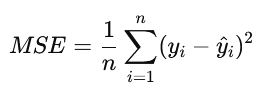

Dimana:

    yiyi​ = nilai aktual data ke-i

    y^iy^​i​ = nilai prediksi model untuk data ke-i

    nn = jumlah total data

    (yi−y^i)2(yi​−y^​i​)2 = kuadrat selisih antara prediksi dan kenyataan untuk setiap titik data

    ∑∑ = simbol penjumlahan semua selisih kuadrat itu

    1nn1​ = diambil rata-ratanya

Definisi: Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual.
MSE menghitung rata-rata dari semua kesalahan kuadrat (error yang dikuadratkan). Dikuadratkan supaya error negatif tidak saling menghapus error positif.

## 2. Root Mean Squared Error (RMSE)

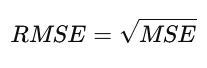

RMSE mengembalikan skala kesalahan ke satuan asli target
Prosedur:
- Ambil nilai MSE yang tadi dihitung
- Lalu akar kuadratkan hasilnya
RMSE lebih mudah diinterpretasikan daripada MSE karena nilainya dalam satuan yang sama dengan target variabel

## 3. R-Squared

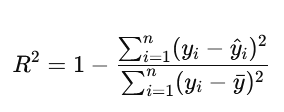

R-Squared mengukur seberapa besar variasi dalam data yang bisa dijelaskan oleh model.

Nilai R-Squared:

    1 → model sempurna

    0 → model sama aja kayak nebak rata-rata

    < 0 → model lebih buruk dari rata-rata (bisa terjadi kalau modelnya ngawur)